In [1]:
import torch
import hiddenlayer as hd

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
data = pd.read_csv('train.csv')
data['month'] = [t.month for t in pd.DatetimeIndex(data.datetime)]
data['year'] = [t.year for t in pd.DatetimeIndex(data.datetime)]
data['year'] = data['year'].map({2011:0, 2012:1})
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0


In [4]:
data.shape

(10886, 14)

Text(0, 0.5, 'bikes rented')

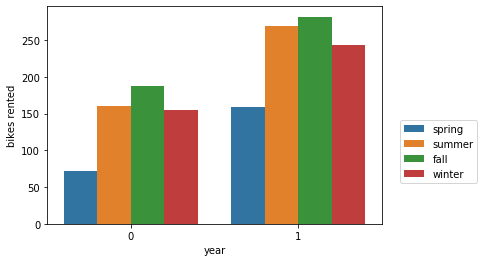

In [5]:
plt.figure()
sns.barplot('year', 'count', hue='season', data = data, ci=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.3,0.5))
plt.xlabel('year')
plt.ylabel('bikes rented')


Text(0.5, 1.0, 'bike rented per month')

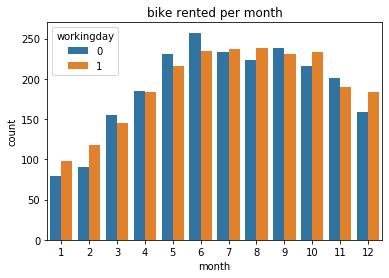

In [6]:
plt.figure()
sns.barplot('month','count', hue='workingday', data=data, ci=None)
plt.title('bike rented per month')


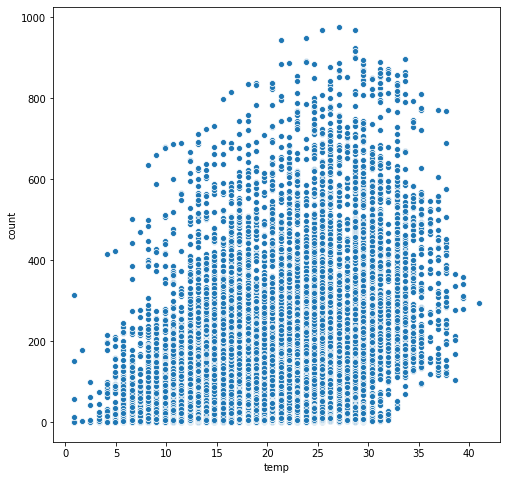

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot('temp', 'count', data=data)

In [8]:
data = pd.get_dummies(data, columns= ['season'])

data.sample(5)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,season_fall,season_spring,season_summer,season_winter
8999,2012-08-17 08:00:00,0,1,1,27.88,12.120,65,8.9981,43,625,668,8,1,1,0,0,0
5890,2012-02-01 15:00:00,0,1,1,24.60,31.060,35,19.0012,25,169,194,2,1,0,1,0,0
2874,2011-07-08 16:00:00,0,1,3,27.88,31.820,83,30.0026,27,105,132,7,0,1,0,0,0
10351,2012-11-16 17:00:00,0,1,1,14.76,17.425,46,12.9980,41,539,580,11,1,0,0,0,1
2546,2011-06-14 00:00:00,0,1,1,24.60,31.060,49,12.9980,13,18,31,6,0,0,0,1,0


In [9]:
columns = ['registered', 'holiday', 
           'workingday','weather', 'temp', 
           'atemp', 'season_fall', 
           'season_spring', 'season_summer', 'season_winter']
features = data[columns]
features.head()

,registered,holiday,workingday,weather,temp,atemp,season_fall,season_spring,season_summer,season_winter
0,13,0,0,1,9.84,14.395,0,1,0,0
1,32,0,0,1,9.02,13.635,0,1,0,0
2,27,0,0,1,9.02,13.635,0,1,0,0
3,10,0,0,1,9.84,14.395,0,1,0,0
4,1,0,0,1,9.84,14.395,0,1,0,0


In [10]:
target = data[['count']]
target.head()

,count
0,16
1,40
2,32
3,13
4,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [13]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [14]:
X_train_tensor.shape

torch.Size([8708, 10])

In [15]:
import torch.utils.data as data_utils

In [16]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [33]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)
len(train_loader)

88

In [34]:
feature_batch, target_batch = iter(train_loader).next()

In [35]:
feature_batch.shape

torch.Size([100, 10])

In [36]:
inp = X_train_tensor.shape[1]
out = 1
hidden = 10
loss_fn = torch.nn.MSELoss()

In [37]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hidden),
                           torch.nn.Linear(hidden, out))

In [38]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [39]:
total_step = len(train_loader)
num_epochs = 10000

for epoch in range(num_epochs+1):
    
    for i, (feature, target) in enumerate(train_loader):
        
        output = model(feature)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
            
        loss.backward()
            
        optimizer.step()
            
        if epoch % 2000 == 0:
                
            print('Epoch [{}/{}], step [{}/{}], Loss : {:.4f}'.
                     format (epoch+1, num_epochs, i+1, total_step, loss.item()))
                
            

Epoch [1/10000], step [1/88], Loss : 75760.4219
Epoch [1/10000], step [2/88], Loss : 81864.2188
Epoch [1/10000], step [3/88], Loss : 90879.8594
Epoch [1/10000], step [4/88], Loss : 78839.9766
Epoch [1/10000], step [5/88], Loss : 85901.5938
Epoch [1/10000], step [6/88], Loss : 94959.1719
Epoch [1/10000], step [7/88], Loss : 72029.1875
Epoch [1/10000], step [8/88], Loss : 59756.5938
Epoch [1/10000], step [9/88], Loss : 106149.8203
Epoch [1/10000], step [10/88], Loss : 82166.1562
Epoch [1/10000], step [11/88], Loss : 62835.2109
Epoch [1/10000], step [12/88], Loss : 93953.7891
Epoch [1/10000], step [13/88], Loss : 109706.7188
Epoch [1/10000], step [14/88], Loss : 81688.0078
Epoch [1/10000], step [15/88], Loss : 88320.9609
Epoch [1/10000], step [16/88], Loss : 66952.6875
Epoch [1/10000], step [17/88], Loss : 87640.7969
Epoch [1/10000], step [18/88], Loss : 81506.8672
Epoch [1/10000], step [19/88], Loss : 92623.2812
Epoch [1/10000], step [20/88], Loss : 100098.1719
Epoch [1/10000], step [21/

KeyboardInterrupt: 

In [40]:
model.eval()

with torch.no_grad():
    y_predict = model(x_test_tensor)

In [41]:
sample = x_test.iloc[45]
sample

registered       157.00
holiday            0.00
workingday         1.00
weather            2.00
temp              24.60
atemp             28.79
season_fall        0.00
season_spring      0.00
season_summer      1.00
season_winter      0.00
Name: 1835, dtype: float64

In [42]:
sample_tensor = torch.tensor(sample.values, dtype=torch.float)
sample_tensor

tensor([157.0000,   0.0000,   1.0000,   2.0000,  24.6000,  28.7900,   0.0000,
          0.0000,   1.0000,   0.0000])

In [43]:
with torch.no_grad():
    y_predict = model(sample_tensor)
print ('predicted count:', y_predict.item())
print ('Actual Count:', y_test.iloc[45])

predicted count: 188.82723999023438
Actual Count: count    186
Name: 1835, dtype: int64


In [44]:
with torch.no_grad():
    y_predict_tensor = model(x_test_tensor)

In [47]:
y_predicted = y_predict_tensor.detach().numpy()
y_predicted.shape

(2178, 1)

In [48]:
y_test.values.shape

(2178, 1)

In [49]:
compare = pd.DataFrame({'Actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_predicted)})
compare.sample(10)

,Actual,predicted
212,98,93.318214
837,257,234.042603
1435,541,393.294800
1137,10,57.931599
922,433,430.859070
318,232,229.309738
2116,532,532.210327
1710,249,234.424530
1740,223,178.572479
1592,276,234.417038


In [50]:
sklearn.metrics.r2_score(y_test, y_predicted)

0.964192068206238

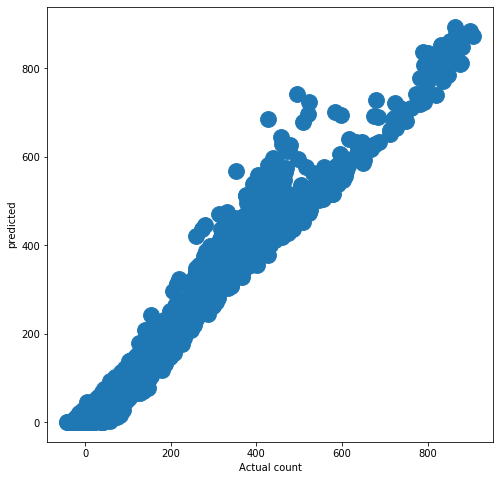

In [54]:
plt.figure(figsize=(8,8))

plt.scatter(y_predicted, y_test.values, s=250)
plt.xlabel('Actual count')
plt.ylabel('predicted')
plt.show()